# Analyzing Fandango Movie Ratings

In 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest.
His findings can be found in [this](https://fivethirtyeight.com/features/fandango-movies-ratings/) article. There was a significant discrepancy between the actual ratings vs the ratings displayed on the website. Mainly, the actual rating was rounded off to the nearest star on the display. It was seen that the movie reviews on Fandango are generally high or very high.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The data can be found [here](https://github.com/mircealex/Movie_ratings_2016_17).

In [66]:
# Reading the data into a DataFrame
import pandas as pd
import matplotlib.pyplot as plt

ratings_old = pd.read_csv('fandango_score_comparison.csv')
ratings_new = pd.read_csv('movie_ratings_16_17.csv')

ratings_old.head()
ratings_new.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [67]:
# Isolating fandango ratings into seperate variables

fandango_old = ratings_old[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()

fandango_new = ratings_new[['movie','year','fandango']].copy()

fandango_new.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The population of interest is the movies which are rated on the Fandango website. Having this information, our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

Sampling Methodology - 
We have two data sets with the movie ratings on the Fandango's website. First, for the movies released in 2015 and second, for the movies released in the year 2016 & 2017. Having two seperate data sets makes it easier to compare the before and after results in our analysis.

In the first data set, the movies which have a minimum of 30 reviews have been selected. The sampling is not random here as there are movies which are missed out because of the minimum reviews criterion check. 
There is a possibility that a movie might be good or bad but didn't have enough reviews and is not present in our analysis.

Similarly, the second data set contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. We do not have a specific number which quantifies the significant number of votes criterion. The samplign here is alos random random as all the movies didn't have an equal chance to be included in the analysis.

### Change in the Current Goals of the Analysis

To continue with our analysis, we change the goals which are still inline with the initial goals to analyse the movie ratings on Fandango website. 

The population of interest changes to the "popular" movies which are rated on the Fandango website. We will determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

# Isolating Movies Data for 2015 and 2016

First dataset -ratings_old, has the movies which have atleast 30 movie reviews. But the second dataset has  a list of famous movies which does not state the number of reviews received for each movie. 

To check if the movies in the second data set have atleast 30 reviews, we can randomly sample a few movies and check the reviews manually on the Fandango website. 

Also, there are some movies were not released in 2015 and 2016 in our data sets. We need to isolate only the sample points that belong to our populations of interest.

In [68]:
# Filtering data sets to contain 2015 and 2016 movies only

ratings_2015 = fandango_old[fandango_old['FILM'].str.contains('2015')]

ratings_2016 = fandango_new[fandango_new['year']==2016]


In [69]:
# Randomly sampling the data from second data set's Fandango movies (fandango_new)

sample_new = fandango_new.loc[fandango_new['movie'].sample(n=10, random_state = 1).index]
sample_new

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Only 9 out of 10 movies are have more than 30 ratings. This is good enough to consider the data set for our analysis.

### Analyzing the Distribution of Movie Ratings in 2015 vs 2016

In [70]:
# Plotting kernel density plots for the distribution of movie ratings of each dataset

ratings_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


(0, 5)

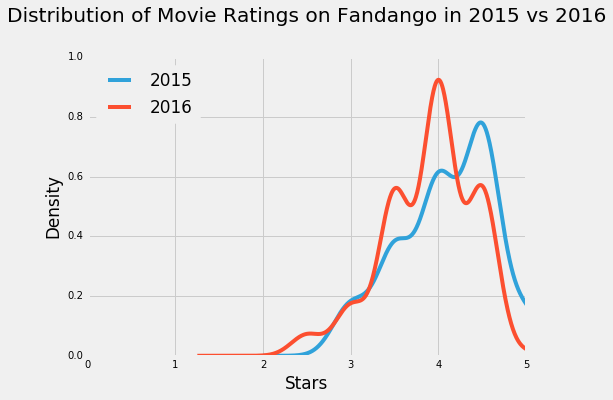

In [71]:
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

ratings_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (7,5),fontsize = 10)
ratings_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title('Distribution of Movie Ratings on Fandango in 2015 vs 2016',y = 1.1)
plt.xlabel('Stars')
plt.xlim(0,5)
# plt.xticks(arange(0,5.1,step=0.5))

- Both the distribution lines are left skewed which shows that the ratings are accumulated where the star ratings are higher. 

- The plot shows that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

- There is definitely a difference in 2016 where the ratings for the movies in 2016 is slightly lower than the ratings in 2015. 

- In 2016, higer number of movies have a 4.0 ratings compared to a rating of 4.5 and 5.0. At the same time, more moves have a 3.5 rating in 2016 compared to the the number of movies in 2015.

- A further analysis can be done to comapre these movies among different move ratings plaoforms such as IMDB, Rotten Tomatoes, Metacritic.

### Analyzing the Frequency Distribution Tables of the Two Distributions

In [72]:
count_2015 = ratings_2015['FILM'].count()
count_2016 = ratings_2016['movie'].count()

print(count_2015)
print(count_2016)

129
191


The count of films in both the datasets are different. So, comparing the two datasets on relative frequencies makes more sense than comparing them on a absolute scale. 

In [73]:
# Analyzing the percentage of movies belonging to each rating category

ratings_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [74]:
ratings_2016['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the percentages above, we see that there is clear difference in the two distributions. We see -
- No movies had a rating of 2.5 in 2015 but a few movies do in 2016.
- There is a marginal decline in the number of movies with a rating of 5.0 in 2016 when comapred to 2015.
- More movies have a rating of 3.5 and 4.0 in 2016 compared to that in 2015. This still brings a question of a understading the direction change in the ratings of the movies. 


### Determining & Analyzing the Direction of Change

- The direction of the difference is not as clear as it was on the kernel density plots. 
- We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. 
- We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [75]:
# Summary Statistics 2015
mean_2015 = ratings_2015['Fandango_Stars'].mean()
mode_2015 = ratings_2015['Fandango_Stars'].mode()[0]
median_2015 = ratings_2015['Fandango_Stars'].median()

# Summary Statistics 2016
mean_2016 = ratings_2016['fandango'].mean()
mode_2016 = ratings_2016['fandango'].mode()[0]
median_2016 = ratings_2016['fandango'].median()

summary = pd.DataFrame()
summary['2016'] = [mean_2016,mode_2016,median_2016]
summary['2015'] = [mean_2015,mode_2015,median_2015]
summary.index = ['mean', 'mode','median']
summary

,2016,2015
mean,3.887435,4.085271
mode,4.000000,4.500000
median,4.000000,4.000000


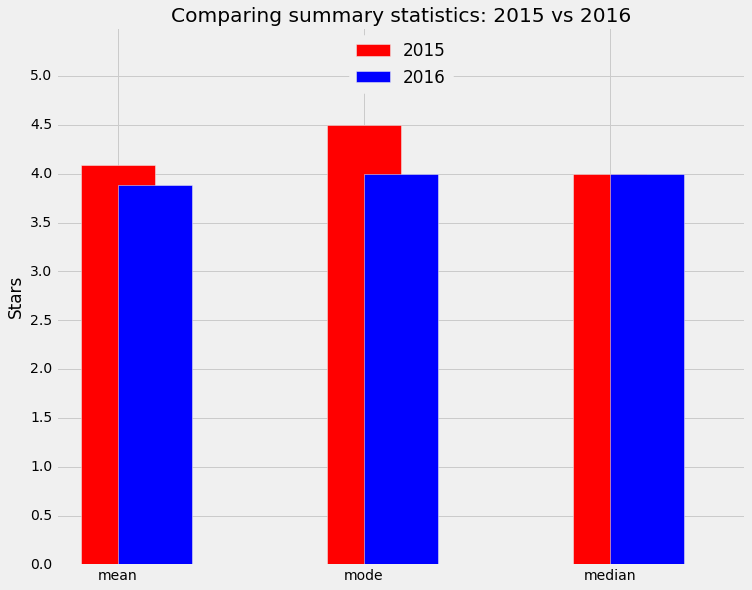

In [76]:
# Plotting summary statistics for 2015 and 2016
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(label = '2015', width = 0.3, align = 'center',color = 'red')
summary['2016'].plot.bar(label = '2016', width = 0.3, align = 'edge',color = 'blue',figsize = (11,9),rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.legend(loc = 'upper center')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.show()

- The mean of the movies in 2016 is slighly lower than the mean of the ratings in 2015.
- The direction of change what we have seen in the kernel density plots is confirmed. On average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015. 

# Conclusion

- From our analysis, we see that there is a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This change in the biased rating system would have been an after effect of Hickey's analysis.
- We were able to see the change using the distribution plot of the two datasets. 
- On average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

